---
### Title: "BellaBeat Case Study"
### Author: "Christian Little"
### Date: "2022-08-18"

## Introduction
BellaBeat is a wellness company that focuses on women health and daily habits. A company which was founded in 2013 by Urška Sršen and Sando Mur. Ever since its start in San Francisco, they have expanded rapidly in the global smart device market. Devices they offer are wearable smart bracelets, smart watches, necklaces, and Hi-tech drinkable water bottles. Each device with its own unique capability to help track womens daily activity. These items help empower women into bringing healthier life decisions to the table. Relevant data is collected throughout they day and proposes new ideas and advice to help further meet their goals. Tabs on hydration levels, sleep activity, menstrual cycles, calories, distance, and stress are all components to making a healthier lifestyle. All of which is kept on an app to ensure women are keeping a personalized and organized lifestyle with the information provided. Bellabeat membership is a subscription based membership that gives the users 24/7 access to personalized guidance on nutrition, activity, sleep, beauty, and mindfulness.

# Act:

### 1. Identify the Business task:

analyze smart device usage data in order to gain insight on growing the company with recommendations and smart business strategies.

### 2. Questions for the analysis:

- What are some trends in smart device usage?

- How could these trends apply to Bellabeat customers?

- How could these trends help influence Bellabeat marketing strategy?

### 3. Key task:

Consider stakeholders Urška Sršen and Sando Mur

# Prepare:

The data for this analysis will come from [FitBit Fitness Tracker](https://www.kaggle.com/datasets/arashnic/fitbit) Data on Kaggle. This data set is composed of 18 csv files all composed within 2016. A total of 38 users consented to the submission of their personal data. Data in which monitored their sleep, physical activity, heart rate, and weight. However, some information is limited due to sample size in some areas, location, age, and lifestyle. For this analysis the datasets of daily activity, weight log, sleep, heart rate, and daily intensities will be used. These files were brought into Google sheets and transfered to R studio for an accurate analysis.


### Installing and loading packages

In [8]:
install.packages("tidyverse", repos='http://cran.us.r-project.org')
install.packages("readr", repos='http://cran.us.r-project.org')
install.packages("here", repos='http://cran.us.r-project.org')
install.packages("janitor", repos='http://cran.us.r-project.org')
install.packages("sqldf", repos='http://cran.us.r-project.org')
library(tidyverse)
library(readr)
library(sqldf)
library(here)

Warning message:
"package 'tidyverse' is in use and will not be installed"
Warning message:
"package 'readr' is in use and will not be installed"


package 'here' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Otis\AppData\Local\Temp\RtmpKSU0kn\downloaded_packages
package 'janitor' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Otis\AppData\Local\Temp\RtmpKSU0kn\downloaded_packages


also installing the dependencies 'plogr', 'gsubfn', 'proto', 'RSQLite', 'chron'




package 'plogr' successfully unpacked and MD5 sums checked
package 'gsubfn' successfully unpacked and MD5 sums checked
package 'proto' successfully unpacked and MD5 sums checked
package 'RSQLite' successfully unpacked and MD5 sums checked
package 'chron' successfully unpacked and MD5 sums checked
package 'sqldf' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Otis\AppData\Local\Temp\RtmpKSU0kn\downloaded_packages


Loading required package: gsubfn

Loading required package: proto

Loading required package: RSQLite

here() starts at C:/Users/Otis



# importing datasets

In [25]:
daily_activity <- read_csv("C:/Users/Otis/Desktop/Bellabeat_2022_07_08/dailyActivity_merged.csv")
daily_calories <- read_csv("C:/Users/Otis/Desktop/Bellabeat_2022_07_08/dailyCalories_merged.csv")
daily_intensities <- read_csv("C:/Users/Otis/Desktop/Bellabeat_2022_07_08/dailyIntensities_merged.csv")
daily_steps<- read_csv("C:/Users/Otis/Desktop/bb/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
heart_rate <- read_csv("C:/Users/Otis/Desktop/Bellabeat_2022_07_08/heartrate_seconds_merged.csv")
sleep_day <- read_csv("C:/Users/Otis/Desktop/Bellabeat_2022_07_08/sleepDay_merged.csv")
weight_log <- read_csv("C:/Users/Otis/Desktop/Bellabeat_2022_07_08/weightLogInfo_merged.csv")
minute_steps <- read_csv("C:/Users/Otis/Desktop/Bellabeat_2022_07_08/minuteStepsWide_merged.csv")


Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 940 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityDay
dbl (2): Id, Calories

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 940 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityDay
dbl (9): Id, SedentaryMinutes, LightlyActiveMinutes, FairlyActiveMinutes, Ve...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the col

# Process:

### Viewing the Data frames

To make sure the data was imported accurately, certain functions were used to guarantee. The head() and Glimpse() function.

In [10]:
head(daily_activity)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


In [11]:
glimpse(daily_activity)

Rows: 940
Columns: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/…
$ TotalSteps               <dbl> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <dbl> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <dbl> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

In [12]:
head(daily_calories)

Id,ActivityDay,Calories
<dbl>,<chr>,<dbl>
1503960366,4/12/2016,1985
1503960366,4/13/2016,1797
1503960366,4/14/2016,1776
1503960366,4/15/2016,1745
1503960366,4/16/2016,1863
1503960366,4/17/2016,1728


In [13]:
head(daily_intensities)

Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,728,328,13,25,0,6.06,0.55,1.88
1503960366,4/13/2016,776,217,19,21,0,4.71,0.69,1.57
1503960366,4/14/2016,1218,181,11,30,0,3.91,0.40,2.44
1503960366,4/15/2016,726,209,34,29,0,2.83,1.26,2.14
1503960366,4/16/2016,773,221,10,36,0,5.04,0.41,2.71
1503960366,4/17/2016,539,164,20,38,0,2.51,0.78,3.19


In [26]:
head(daily_steps)

Id,ActivityDay,StepTotal
<dbl>,<chr>,<dbl>
1503960366,4/12/2016,13162
1503960366,4/13/2016,10735
1503960366,4/14/2016,10460
1503960366,4/15/2016,9762
1503960366,4/16/2016,12669
1503960366,4/17/2016,9705


In [27]:
head(heart_rate)

Id,Time,Value
<dbl>,<chr>,<dbl>
2022484408,4/12/2016 7:21:00 AM,97
2022484408,4/12/2016 7:21:05 AM,102
2022484408,4/12/2016 7:21:10 AM,105
2022484408,4/12/2016 7:21:20 AM,103
2022484408,4/12/2016 7:21:25 AM,101
2022484408,4/12/2016 7:22:05 AM,95


In [28]:
head(sleep_day)

Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


In [29]:
head(weight_log)

Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,TRUE,1.462234e+12
1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,TRUE,1.462320e+12
1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,FALSE,1.460510e+12
2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,TRUE,1.461283e+12
2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,TRUE,1.463098e+12
4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,TRUE,1.460938e+12


In [31]:
head(minute_steps)

Id,ActivityHour,Steps00,Steps01,Steps02,Steps03,Steps04,Steps05,Steps06,Steps07,⋯,Steps50,Steps51,Steps52,Steps53,Steps54,Steps55,Steps56,Steps57,Steps58,Steps59
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/13/2016 12:00:00 AM,4,16,0,0,0,9,0,17,⋯,0,9,8,0,20,1,0,0,0,0
1503960366,4/13/2016 1:00:00 AM,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1503960366,4/13/2016 2:00:00 AM,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1503960366,4/13/2016 3:00:00 AM,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1503960366,4/13/2016 4:00:00 AM,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1503960366,4/13/2016 5:00:00 AM,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


# Removing Data Frames:

Each data frames contained ''id'' column so it was necessary to merge. Another name for daily_activity was given to create a separate and temporary data frame. 
The SQL package was loaded to bring out three important columns in daily_activity. 

In [36]:
library(sqldf)

In [38]:
daily_activity_2 <- daily_activity %>%
select(Id, ActivityDate, Calories)
head(daily_activity_2)
sql_check <-sqldf('select* FROM daily_activity_2 INTERSECT SELECT * FROM daily_calories')
head(sql_check)

Id,ActivityDate,Calories
<dbl>,<chr>,<dbl>
1503960366,4/12/2016,1985
1503960366,4/13/2016,1797
1503960366,4/14/2016,1776
1503960366,4/15/2016,1745
1503960366,4/16/2016,1863
1503960366,4/17/2016,1728


,Id,ActivityDate,Calories
,<dbl>,<chr>,<dbl>
1,1503960366,4/12/2016,1985
2,1503960366,4/13/2016,1797
3,1503960366,4/14/2016,1776
4,1503960366,4/15/2016,1745
5,1503960366,4/16/2016,1863
6,1503960366,4/17/2016,1728


## Exploring and summarizing data

 The n_distinct() and nrow() functions are used to determine the number of unique values and the number of rows in a data frame, respectively.

In [41]:
n_distinct(daily_activity$Id)
n_distinct(sleep_day$Id)
n_distinct(weight_log$Id)
n_distinct(daily_activity$Id)
nrow(daily_activity)
nrow(sleep_day)

[1] 33

[1] 24

[1] 8

[1] 33

[1] 940

[1] 413

The Summary() function was used to grab key statistics about the data frame

Daily_Activity

In [56]:
daily_activity %>%
select(TotalSteps,TotalDistance,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes, Calories) %>%
summary()

   TotalSteps    TotalDistance    SedentaryMinutes LightlyActiveMinutes
 Min.   :    0   Min.   : 0.000   Min.   :   0.0   Min.   :  0.0       
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 729.8   1st Qu.:127.0       
 Median : 7406   Median : 5.245   Median :1057.5   Median :199.0       
 Mean   : 7638   Mean   : 5.490   Mean   : 991.2   Mean   :192.8       
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:1229.5   3rd Qu.:264.0       
 Max.   :36019   Max.   :28.030   Max.   :1440.0   Max.   :518.0       
 FairlyActiveMinutes VeryActiveMinutes    Calories   
 Min.   :  0.00      Min.   :  0.00    Min.   :   0  
 1st Qu.:  0.00      1st Qu.:  0.00    1st Qu.:1828  
 Median :  6.00      Median :  4.00    Median :2134  
 Mean   : 13.56      Mean   : 21.16    Mean   :2304  
 3rd Qu.: 19.00      3rd Qu.: 32.00    3rd Qu.:2793  
 Max.   :143.00      Max.   :210.00    Max.   :4900  

This Summary shows that the average person took about 7638 steps a day. Seems like alot, however, its still under the recommended amount provided by the CDC [1]. To futher, it seems as though users have high sedentary mintues of at least 991.2 per week. This particaulary is a high risk for day to day workouts excluding what the users diet is. On the bright side, users had an average of 21.16 mintues of very active mintues per day which sets them above the average of  high active workout mintues per week. CDC claims a person should workout at least 75 minutes a week but these users exceeded past the required amount by a sizable margin, thus being on track for losing 2-3 pounds per week.

heart_rate

In [57]:
heart_rate %>%
  select(Value) %>%
  summary()

     Value       
 Min.   : 36.00  
 1st Qu.: 63.00  
 Median : 73.00  
 Mean   : 77.33  
 3rd Qu.: 88.00  
 Max.   :203.00  

Despite the low numbers of users in this section, it seems as though the heartrate for women is at a "normal" range. For women, normal is considered anything betweeen 53-82 BPM. However, study shows that it is vital to understand their own bodies an adjust accordingly to whats right for them. This is because resting heart rate differ between a person. Factors such as mestrual cycles or infections can really change a women heart rate so thats why its important to take personal note.

Sleep_day

In [60]:
sleep_day %>%
  select(TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed) %>%
  summary()

 TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Min.   :1.000     Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.000     1st Qu.:361.0      1st Qu.:403.0  
 Median :1.000     Median :433.0      Median :463.0  
 Mean   :1.119     Mean   :419.5      Mean   :458.6  
 3rd Qu.:1.000     3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.000     Max.   :796.0      Max.   :961.0  

The summary of sleeps shows that each day, the user gets about 7.64 hours of sleep. This is promising, given the fact that CDC wants people to have at least 7 hours of sleep for a well rested brain. Time in bed awake falls positively short because reasearch suggests that no person should spend more than an hour in bed awake. Some studies shows that this could lead to links within your brain that would cause insomnia.

Weight_log

In [61]:
weight_log %>%
  select(WeightKg,WeightPounds,Fat,BMI,) %>%
  summary()

    WeightKg       WeightPounds        Fat             BMI       
 Min.   : 52.60   Min.   :116.0   Min.   :22.00   Min.   :21.45  
 1st Qu.: 61.40   1st Qu.:135.4   1st Qu.:22.75   1st Qu.:23.96  
 Median : 62.50   Median :137.8   Median :23.50   Median :24.39  
 Mean   : 72.04   Mean   :158.8   Mean   :23.50   Mean   :25.19  
 3rd Qu.: 85.05   3rd Qu.:187.5   3rd Qu.:24.25   3rd Qu.:25.56  
 Max.   :133.50   Max.   :294.3   Max.   :25.00   Max.   :47.54  
                                  NA's   :65                     

This summary shows that the average BMI is 25.19. On record this could be considered overweight, but with missing elements such as height and age, its unknown.

# Share:

The ggplot() function of R Studio was used to create data visualizations that depict patterns and trends found in the data frames.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



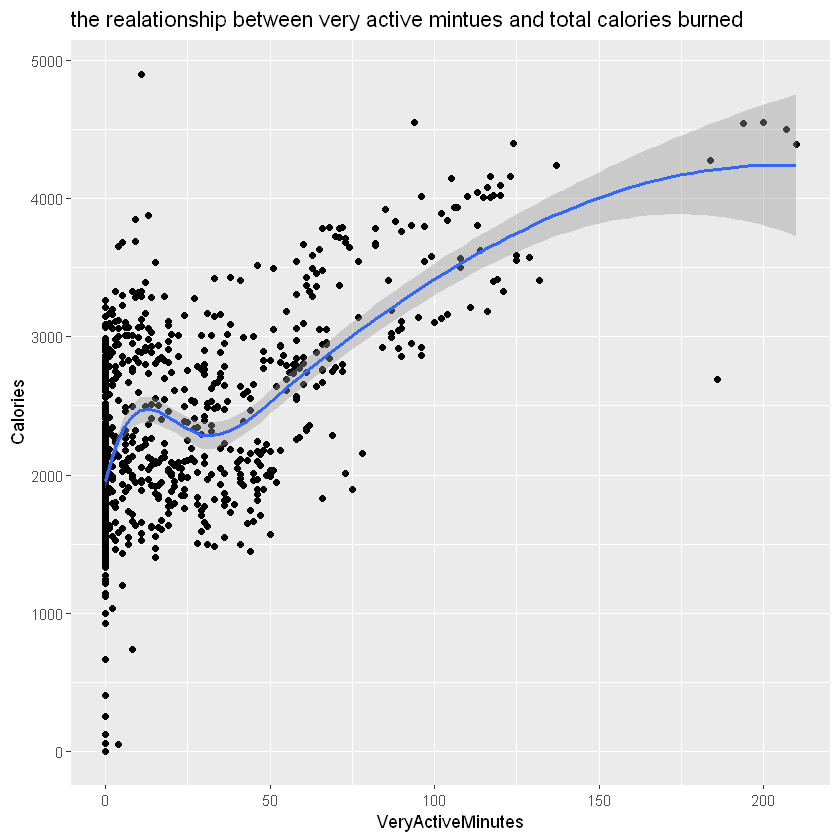

In [63]:
ggplot(data = daily_activity)+geom_point(mapping = aes(x=VeryActiveMinutes,y=Calories))+ geom_smooth(mapping = aes(x=VeryActiveMinutes,y=Calories))+ labs(title = "the realationship between very active mintues and total calories burned")

Plot 1 shows the realationship between very active minutes and total calories burned. Looking at his plot shows us that the more intense the workouts were, the more calories you would burn.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



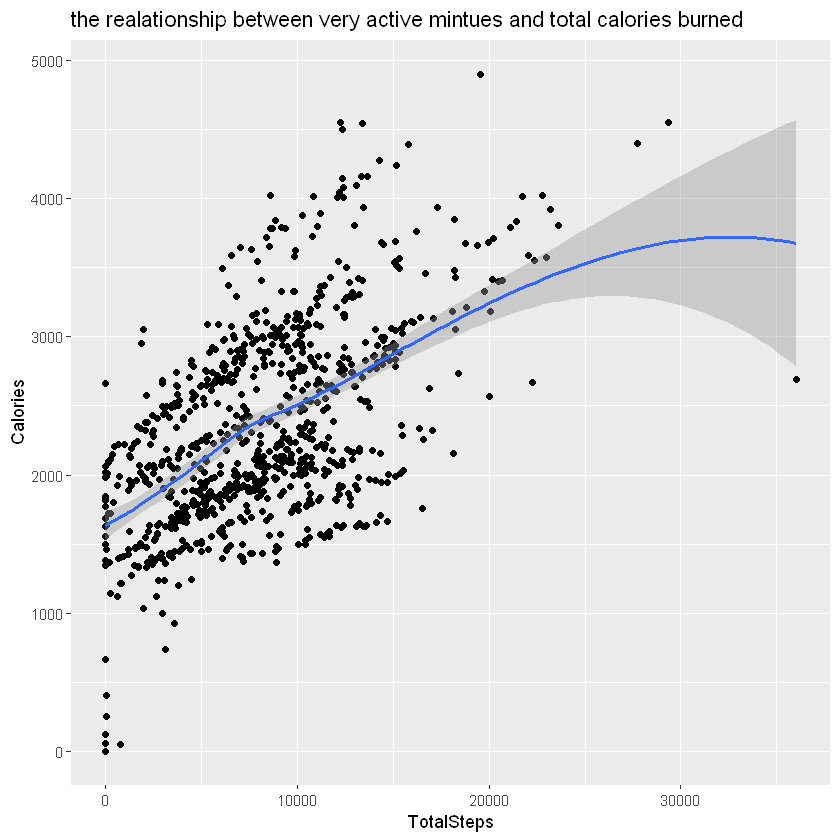

In [64]:
ggplot(data = daily_activity)+geom_point(mapping = aes(x=TotalSteps,y=Calories))+ geom_smooth(mapping = aes(x=TotalSteps,y=Calories))+ labs(title = "the realationship between very active mintues and total calories burned")

Plot 2 shows us the realationship between total steps and calories burned. Judging of of the chart it seems as though the more the users took a high amount of steps, the more they would burn in calories.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



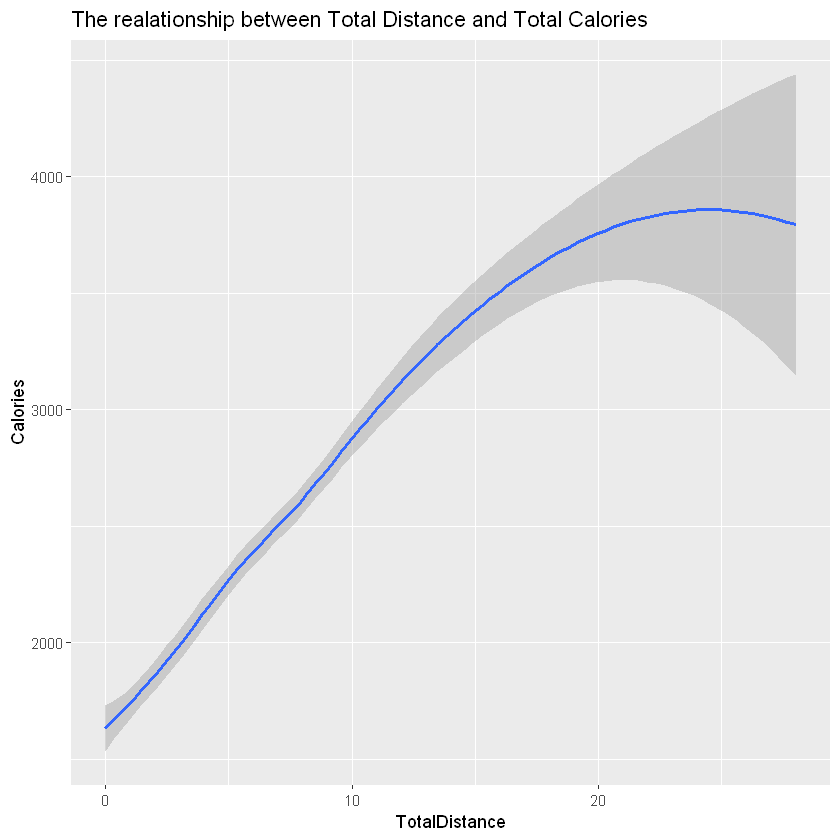

In [65]:
ggplot(data = daily_activity)+geom_smooth(mapping = aes(x=TotalDistance, y=Calories)) + labs(title =  "The realationship between Total Distance and Total Calories")

Plot 3 shows us the realationship between total distance and calories burned. Study claims that the further the distance, the more calories you burn. It seems as though these users were on a steady track for meeting the standard goal of a healthy lifestyle.

# Act:

BellaBeat has so far been a successful company in the health based smart device market. It has, in many ways, truly empowered women to have a better understanding of their health habits. Providing motivation by closely tracking their sleep, activity, stress, hydration levels, and reproductive health. After analyzing and studying the data, there are helpful reccomendations that can be given to improve the companies growth exponentially.

The BellaBeat app should definitely be revised in order to bring more attention to users and non-users. Inspiration should be instilled to further interest their need to be on the app daily. Better connectivity should be implemented to bring more attention. Ideas such as expanding the social aspect of the app and allowing women to collect, transfer, and share their information. With this, a stronger foundation could bring women together socially as some sort of sister-hood to help inspire each other. It is essential in life to have a partner of some sort to help motivate each other throughout vigorous acitivty to keep better consistency. If this feature was an option, womens health would be better prioritized.

### Recommendations for Bellabeat app:

- offer a social networking feature so users can post their favorite workouts, wellness advice, healthy meals, etc.
- Enable users to add friends and view each other’s activity on a day to day basis.
- Create weekly challenges that go beyond CDC recommended workouts.
- Advertising and marketing in many areas.
- enable alert notifications to remind users of their goals even if met.
- enable a text entry that allows women to put in their height, age, and weight.
- Enable notifications to encourage activity if a user has been sedentary for an extended period of time.
- suggests certain workout on different parts of the body that would be helpful.
- Recommend users to get at least 7 hours of sleep a night and enable alert notifications to encourage users to meet this.


###  Recommendations for Bellabeat Memberships

- offer 30-day free trial subscription
- Offer discounts for Bellabeat smart device products with membership.
- Partner with health & fitness companies and offer discounts for members.
- Offer cheaper subscription fee when a member refers a friend.

### Recommendations for Bellabeat products:

- Offer a bundle deal for the Spring and Leaf together.
- Heavily market the fashion of the wearbles products.
- Present colorful and dynamic options for the spring water bottles.

# Work cited:

https://bellabeat.com/

https://www.cdc.gov/sleep/about_sleep/how_much_sleep.html

https://www.cnn.com/2017/06/22/health/sitting-exercise-davis#:~:text=The%20damage%20from%20prolonged%20sitting,and%20remove%20harmful%20blood%20fats.

https://www.healthcentral.com/article/spend-less-time-in-bed-if-you-want-more-sleep

https://www.cdc.gov/physicalactivity/basics/adults/index.htm

https://www.cdc.gov/diabetes/library/spotlights/workout-buddy.html

https://www.healthline.com/health-news/what-your-heart-rate-says-about-your-health

https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html